Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [62]:
# imports and setup
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix # for Q1 classification like mission

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns

In [63]:

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


In [64]:
X

array([[-0.3037564 ,  0.27194296, -1.2984626 , ..., -0.22927702,
         0.60290063,  0.2063805 ],
       [-0.20053269, -0.30437116, -0.97295527, ..., -0.12643629,
         1.27256776, -0.06419889],
       [ 1.35097255,  0.93048323, -0.43242865, ..., -0.45356427,
         1.06455736, -1.02736984],
       ...,
       [-1.45953712, -1.64844822,  1.8947674 , ...,  1.30241496,
        -1.92201715,  0.78623258],
       [-0.5009657 ,  0.16483753, -1.07666519, ..., -0.55959232,
         1.78642312,  0.35648516],
       [ 0.71776702,  1.26195986, -0.0965376 , ..., -1.2768736 ,
        -0.5557099 ,  1.08032666]])

In [65]:
y_true
#(1) Yes, y_true is the ground truth cluster label in make-blobs.
# Tags do not indicate order; They just mark which cluster each point belongs to.
#(2) `Make_flobs first generates Gaussian points around each center, assigns cluster IDs as "y_true", and then performs shuffling on all samples.
#That's why the data is not grouped, but 'y_true' still tracks the true cluster of each sample.


array([0, 0, 4, 1, 1, 4, 4, 2, 1, 2, 4, 3, 0, 3, 4, 3, 2, 1, 0, 3, 3, 3,
       3, 4, 0, 0, 1, 2, 4, 1, 0, 0, 4, 3, 4, 3, 4, 0, 0, 1, 3, 4, 4, 4,
       3, 4, 0, 3, 1, 2, 1, 4, 2, 4, 0, 0, 0, 0, 1, 3, 2, 3, 1, 0, 1, 3,
       3, 3, 3, 0, 0, 1, 1, 1, 2, 0, 3, 1, 4, 1, 1, 0, 0, 0, 4, 2, 0, 1,
       2, 3, 2, 2, 4, 1, 2, 1, 3, 3, 1, 2, 2, 3, 2, 2, 4, 3, 3, 3, 2, 0,
       0, 4, 2, 3, 3, 4, 1, 2, 2, 4, 4, 3, 3, 0, 2, 4, 4, 2, 2, 3, 3, 2,
       4, 1, 0, 1, 4, 3, 3, 0, 2, 2, 3, 3, 3, 0, 3, 3, 2, 4, 1, 1, 0, 1,
       4, 3, 2, 4, 3, 1, 0, 1, 3, 0, 3, 3, 2, 2, 1, 2, 2, 3, 4, 0, 4, 0,
       4, 3, 4, 1, 2, 0, 1, 0, 3, 0, 4, 3, 0, 1, 1, 0, 2, 3, 2, 1, 0, 0,
       3, 4, 4, 3, 3, 4, 0, 2, 4, 1, 2, 2, 0, 3, 3, 3, 4, 3, 2, 3, 4, 1,
       2, 0, 4, 2, 2, 1, 1, 3, 2, 3, 3, 4, 4, 2, 1, 4, 0, 1, 2, 4, 1, 2,
       0, 4, 2, 4, 4, 0, 2, 3, 4, 0, 4, 3, 0, 1, 4, 4, 0, 3, 3, 1, 4, 2,
       3, 0, 0, 0, 2, 0, 2, 2, 0, 3, 3, 4, 1, 2, 4, 3, 0, 0, 4, 0, 1, 3,
       4, 2, 2, 2, 2, 4, 1, 0, 0, 1, 1, 0, 1, 2, 0,

# y_true is the true group label directly from make_blobs

# Find ("optimal") number of clusters k first

method1
[Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

[np.float64(0.4150097488925307), np.float64(0.5155238155989122), np.float64(0.6265345233835395), np.float64(0.6611375445369994), np.float64(0.5459710483055447), np.float64(0.4509247059520141), np.float64(0.35252777761527054), np.float64(0.34863797052141854)]


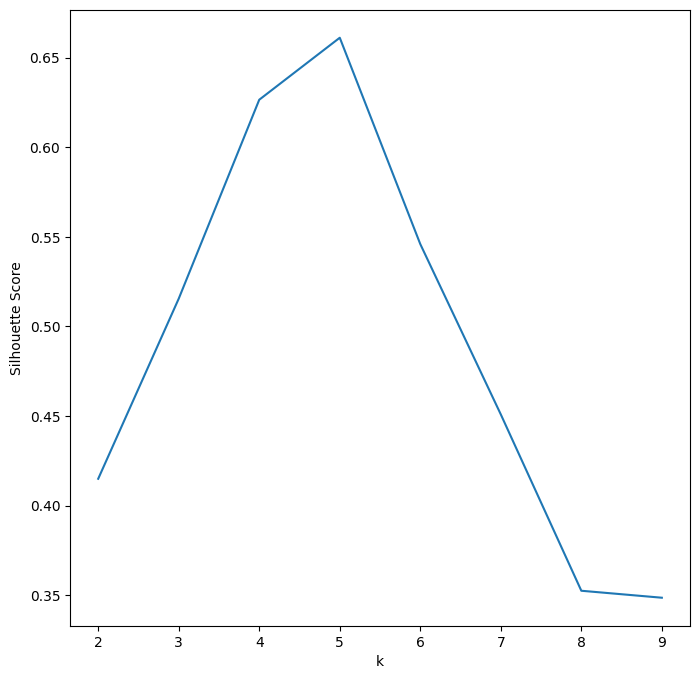

In [66]:
#
#2
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters_k = [2, 3, 4, 5,6,7,8,9]
silhouette_avg_k = []


for n_clusters_k in range_n_clusters_k:
    clusterer_k = KMeans(n_clusters=n_clusters_k, random_state=10)
    cluster_labels_k = clusterer_k.fit_predict(X)
    silhouette_avg_k.append(silhouette_score(X, cluster_labels_k))

print(silhouette_avg_k)
plt.plot(range_n_clusters_k,silhouette_avg_k)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

method 2 inertia value (only check total intra-cluster distance)

so yes k=5 best

>0.7 means the clusters are seperatelly.So, okay silhouette_score

[6504.839875872424, 3836.3771369424576, 1780.4172638655577, 924.3159961688092, 892.6443542470599, 862.5921665100362, 823.7100949928089, 807.3096971848739]


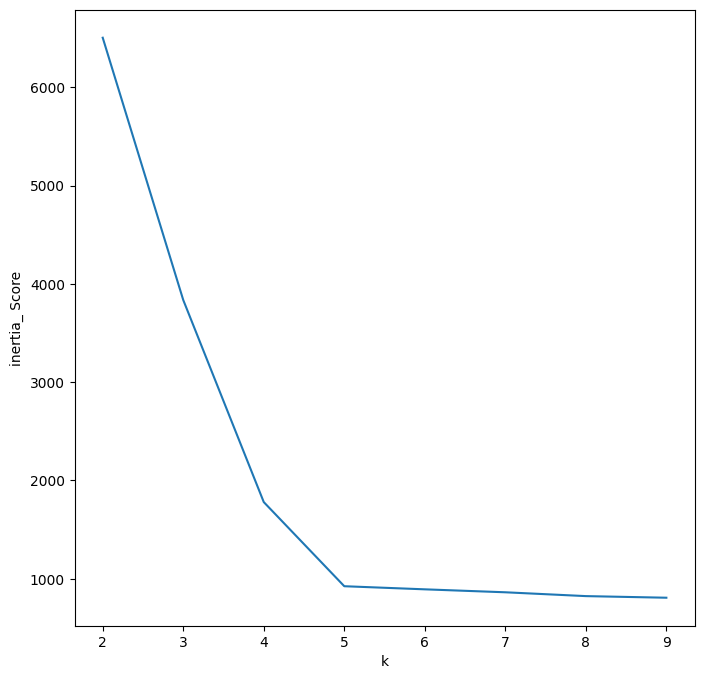

In [67]:

inertia_1 = []


for n_clusters_k in range_n_clusters_k:
    clusterer_k_2 = KMeans(n_clusters=n_clusters_k, random_state=10)
    cluster_labels_k = clusterer_k_2.fit_predict(X)
    inertia_1.append(clusterer_k_2.inertia_)

print(inertia_1)
plt.plot(range_n_clusters_k,inertia_1)
plt.xlabel('k')
plt.ylabel('inertia_ Score')
plt.show()

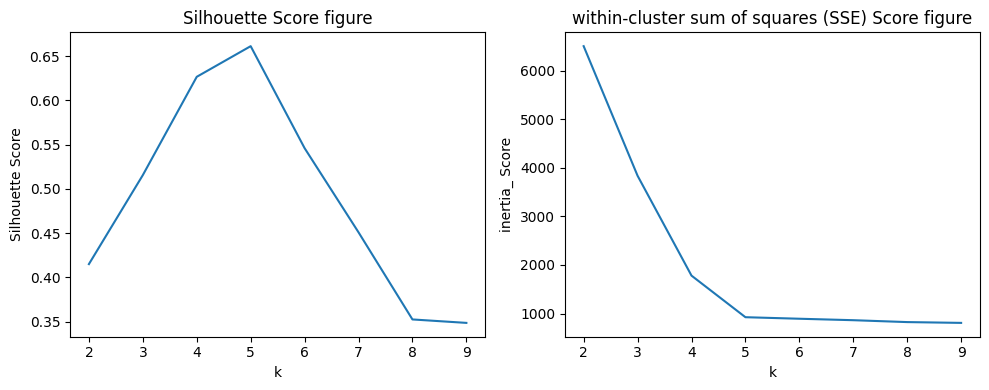

In [68]:
fig_choose_k_Q1, axes_choose_k_Q1 = plt.subplots(1, 2, figsize=(10,4))

axes_choose_k_Q1[0].plot(range_n_clusters_k,silhouette_avg_k)
axes_choose_k_Q1[0].set_xlabel('k')
axes_choose_k_Q1[0].set_ylabel('Silhouette Score')
axes_choose_k_Q1[0].set_title('Silhouette Score figure')

axes_choose_k_Q1[1].plot(range_n_clusters_k,inertia_1)
axes_choose_k_Q1[1].set_xlabel('k')
axes_choose_k_Q1[1].set_ylabel('inertia_ Score')
axes_choose_k_Q1[1].set_title('within-cluster sum of squares (SSE) Score figure')

plt.tight_layout()
plt.show()


Also, k=5

# For smallest inertia value.

In k-means, inertia value (sum of within-cluster sum of squares) is affected by init method (k-means++ gives better starting centroids), n_init (number of runs), and max_iter (convergence steps). max_iter=1 risks poor clustering.
Note:
Defaults in scikit-lear's KMeans:

init="k-means++" (better centroid seeds, avoids poor clustering).

n_init=10 (run algorithm 10 times, keep best inertia).

max_iter=300 (allow up to 300 updates per run).

In [69]:
kmeans_model_Q1=KMeans(n_clusters=5, random_state=10, n_init=100, max_iter=1000)# looks like it converge already
fit_object_Q1=kmeans_model_Q1.fit(X)


inertia_score_Q1=kmeans_model_Q1.inertia_
print("inertia_score for Q1 is:", inertia_score_Q1)
924.3159961688092

inertia_score for Q1 is: 924.3159961688092


924.3159961688092

In [70]:
# Note: kmeans_model_Q1.inertia_=fit_object_Q1.inertia_

# 1.2 Visualization, PCA

In [71]:
cluster_group_label_Q1_predicted_k_means=kmeans_model_Q1.labels_ # This returns the assigned cluster label (group label) for each data point. But not the same gorup labering system as the make_blobs


In [72]:
#cluster_group_label_Q1_predicted_k_means

In [90]:
centroid_Q1=kmeans_model_Q1.cluster_centers_ # store centroid
# in scikit-learn, centroid_Q1 are ordered by cluster index (0,1,…,5), matching the labels in kmeans_model_Q1.labels_

In [74]:
#2 Store the principal components in a pandas dataframe
pca_model = PCA()
X_PCA_Q1 = pca_model.fit_transform(X)# return an numpy array


In [91]:
# 2.2: pca to center too
centroid_PCA_Q1=pca_model.transform(centroid_Q1)

In [75]:
X_PCA_Q1.shape

(1000, 10)

In [76]:
df_plot_Q1 = pd.DataFrame(X_PCA_Q1, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10'])
# this pd df gives coordinates of sample i (row)(from X) expressed in the PC A basis.Note the row's order is the same as X
#df_plot_Q1.head()

In [77]:
# add predicted cluter label by k-means
df_plot_Q1['cluster group Q1']=cluster_group_label_Q1_predicted_k_means

In [78]:
df_plot_Q1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster group Q1
0,0.546613,-0.615149,-2.604578,-0.281329,-0.741536,0.016610,0.325764,0.190555,0.038105,0.201463,3
1,0.241234,-1.225602,-2.984748,0.282824,-0.282873,-0.223029,-0.094638,0.177147,-0.131490,0.100223,3
2,1.699376,-1.414747,0.957550,1.235807,0.196704,0.570600,-0.143160,-0.054570,0.172934,0.187943,1
3,0.493764,-1.099827,0.625651,-1.360638,0.626130,0.176493,-0.391839,-0.157058,0.273428,0.145375,4
4,0.527606,-1.151416,1.119964,-1.770453,0.363161,0.570393,0.511017,-0.372639,-0.291281,0.722248,4


3 visualization

In [79]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
#e41a1c = red, #984ea3 = purple, #a65628 = brown, #377eb8 = blue, #ffff33 = yellow, #4daf4a = green,#ff7f00 = orange

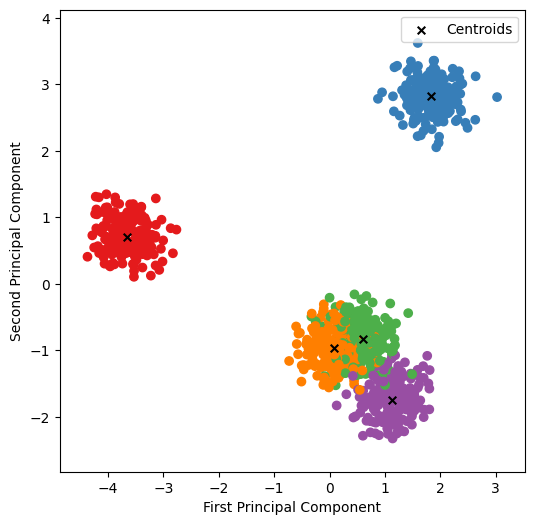

In [99]:
plt.rcParams['figure.figsize'] = (6, 6)
fig,ax_Q1 = plt.subplots()

ax_Q1.set_xlim(df_plot_Q1["PC1"].min()-0.5,df_plot_Q1["PC1"].max()+0.5) # set PC1 and PC2 axies length
ax_Q1.set_ylim(df_plot_Q1["PC2"].min()-0.5,df_plot_Q1["PC2"].max()+0.5)

# Plot Principal Components 1 and 2 in R^2
ax_Q1.scatter(df_plot_Q1["PC1"], df_plot_Q1["PC2"], c=df_plot_Q1['cluster group Q1'],  marker="o", cmap=cmap)

# plot centroid
plt.scatter(centroid_PCA_Q1[:,0], centroid_PCA_Q1[:,1],# this means the first and second entry of the numpy array, PC1 axis (direction) coordiante and PC2 direction coordinate of the centroid
            c="black", marker="x", s=30, label="Centroids")


ax_Q1 .set_xlabel('First Principal Component')
ax_Q1 .set_ylabel('Second Principal Component')
ax_Q1.legend()

plt.show()

# 1.3 confusion matric


K-means assigns cluster group IDs arbitrarily (such as 0, 1, 2...) without considering the "make_blobs" numbering system. Both tag arrays are aligned with the sample order of data points, but their group numbering systems are different. Ex, the cluster group 1 is not the same as the label 1 in make-blobs"

-  The predicted class label corresponds to the label in cluster_group_label_Q1_predicted_k_means, while the true class label here is the one that corresponds to the label in the "make_blobs" system.

In [100]:
from sklearn.metrics import pairwise_distances_argmin_min

closest_index_or_cluster_examplar_index_that_coressponds_in_X, _ = pairwise_distances_argmin_min(
    centroid_Q1, X # the comparison is not te coordinates after PCA
)
exemplars = X[closest_index_or_cluster_examplar_index_that_coressponds_in_X]
print(closest_index_or_cluster_examplar_index_that_coressponds_in_X)
exemplars

[635 503 307 561 829]


array([[-1.26166669, -1.36490409,  2.12660244, -0.56855459,  0.8585857 ,
        -0.66974716,  0.61012625,  1.38200302, -1.46923155,  0.77812206],
       [ 1.49821557,  0.20182268, -0.11272875,  0.46701739, -0.82091875,
        -0.15238804,  1.54370933, -0.62995797,  0.58389964, -1.02593181],
       [ 0.56674866,  1.15268497, -0.06149501,  0.15369339,  1.34511434,
         1.48331257, -1.29032206, -1.16207287, -0.18535149,  1.19453659],
       [-0.35699807,  0.01531058, -1.09312017, -1.62482606, -0.60041016,
        -1.12894438, -0.99930535, -0.34949134,  1.36452937,  0.098352  ],
       [-0.46501218, -0.21405718, -0.36605229,  0.9094477 , -0.97608333,
         0.52762796,  0.03959958,  0.42896491, -0.38418946, -0.9979179 ]])

In [101]:
df_plot_Q1['True group label Q1']=y_true

In [102]:
df_plot_Q1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster group Q1,True group label Q1
0,0.546613,-0.615149,-2.604578,-0.281329,-0.741536,0.016610,0.325764,0.190555,0.038105,0.201463,3,0
1,0.241234,-1.225602,-2.984748,0.282824,-0.282873,-0.223029,-0.094638,0.177147,-0.131490,0.100223,3,0
2,1.699376,-1.414747,0.957550,1.235807,0.196704,0.570600,-0.143160,-0.054570,0.172934,0.187943,1,4
3,0.493764,-1.099827,0.625651,-1.360638,0.626130,0.176493,-0.391839,-0.157058,0.273428,0.145375,4,1
4,0.527606,-1.151416,1.119964,-1.770453,0.363161,0.570393,0.511017,-0.372639,-0.291281,0.722248,4,1


In [104]:
print(df_plot_Q1['True group label Q1'][635], df_plot_Q1['cluster group Q1'][635])
# yes, the order in closest_index_or_cluster_examplar_index_that_coressponds_in_X array matches the cluster group.
# group 0 exemplar label (0) index in df_plot_Q1 is the 1st entry of closest_index_or_cluster_examplar_index_that_coressponds_in_X. This makes the matching proess simpler

3 0


goal: fix cluster group Q1 label. Process: sawaping predicted group k to k'.Where k is reprented by exemplar_k (clsuter k), and k' is the ground truth label in "True group label Q1" column of df_plot_Q1.

ex, changing all 3 to 1. Cluster 3 → 1.

So formally, the data point in X whcih is closest to the centroid k (k_th partiion S_k) is called cluster exemplar_k.

So I use the exemplar_k in group k to represent the assigned cluter labels of all points in group k.

Also note that I am assuming the cluter exemplar_k label matched the true group label in make_blobs. So this works to match the ordering systems between "make_blobs" and clustering  now.

Next steps: (2)Find the true group label k' in the "make_blobs" system for exemplar_k, which stands for the group partition label k' for all points in group k. (3) Fix all the cluster group k labe (predicted) by indexing in the df based on the index of exemplar_k.

In [106]:
for i in range(5):
  #df_plot_Q1.loc[df_plot_Q1["cluster group Q1"] == i, "cluster group Q1"] = df_plot_Q1[df_plot_Q1["True group label Q1"][closest_index_or_cluster_examplar_index_that_coressponds_in_X[i]]]
  df_plot_Q1.loc[df_plot_Q1["cluster group Q1"] == i, "cluster group Q1"] = df_plot_Q1.loc[closest_index_or_cluster_examplar_index_that_coressponds_in_X[i],'True group label Q1']
  #Note1: df.loc[x,y], value of (x,y)th entry in df
  #Note2:  above code: all integer i in "cluster group Q1" column → df_plot_Q1.loc[x,'True group label Q1'], where x= index of exempler_i


In [111]:
df_plot_Q1.tail(40)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster group Q1,True group label Q1
960,2.140814,2.567081,0.086857,0.210163,0.154122,-0.110461,-0.125371,-0.142570,-0.640285,0.086142,2,2
961,-2.762525,0.815574,0.705092,0.005421,0.131959,-0.639780,0.352322,0.302249,-0.403389,-0.045533,0,3
962,-4.004860,0.540082,0.676449,0.146659,-0.155323,-0.203121,-0.037050,0.123647,0.067305,0.297146,0,3
963,0.731361,-0.714443,-2.259238,-0.390882,0.452928,-0.300144,0.031763,-0.148257,-0.081375,-0.106741,0,0
964,-0.114834,-1.044693,0.767346,-1.795933,0.380126,-0.483012,-0.236843,-0.050702,-0.495077,0.039765,1,1
965,-0.263195,-1.237967,0.989252,-1.221876,-0.115598,-0.456266,-0.411631,-0.051064,-0.061024,0.005609,1,1
966,1.633336,2.866239,0.169665,0.303025,0.316736,-0.237934,-0.434555,0.207610,0.293266,-0.046179,2,2
967,-4.280401,0.728775,-0.063614,0.056019,-0.382659,0.370281,-0.758253,0.053560,-0.179579,-0.022516,0,3
968,0.691995,-2.012046,1.426935,0.872879,-0.060872,-0.077567,-0.189497,0.165031,0.213940,-0.111838,1,4
969,1.115526,-0.711764,-2.518327,-0.020930,-0.597003,0.459700,0.058747,-0.137205,-0.330876,-0.087303,0,0


# 2. Clustering Fashion-MNIST using $k$-means

In [83]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X_2, y_2 = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y_2 = y_2.astype(int)

print(type(X_2),X_2.shape)
print(type(y_2),y_2.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [84]:
# your code here

# 3. Dimensionality reduction for Fashion-MNIST

In [85]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [86]:
# your code here